# Домашняя работа 2.

### Машинные методы в помощь обработке данным

In [49]:
import pandas as pd

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [51]:
import matplotlib.pyplot as plt

https://www.kaggle.com/c/boston-housing/overview

Таблица цен на дома в Бостоне

- CRIM: Это уровень преступности на душу населения по городам
- ZN: Это доля жилой земли, зонированной для участков более 25 000 кв. футов.
- INDUS: Это доля не торговых площадей в каждом городе.
- CHAS: Это фиктивная переменная реки Charles River (она равна 1, если тракт ограничивает реку; в противном случае 0)
- NOX: это концентрация оксидов азота (частей на 10 миллионов)
- RM: это среднее количество комнат на одно жилище
- AGE: Это доля занятых владельцем единиц, построенных до 1940 года
- DIS: Это взвешенные расстояния до пяти бостонских центров занятости
- RAD: Это показатель доступности радиальных магистралей
- TAX: это полная стоимость налога на имущество на 10 000 долларов
- PTRATIO: Это соотношение учеников и учителей по городам
- B: Это рассчитывается как 1000 (Bk - 0,63) ², где Bk - это доля людей афроамериканского происхождения по городам.
- LSTAT: это процент низкого статуса населения
- MEDV: это средняя стоимость домов, занимаемых владельцами, в 1000 долларов.

In [52]:
data_house = pd.read_csv('homework.csv')
data_house.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [53]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


333 строк, пропущенных данных нет

In [54]:
data_house.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

### 1. Решить задачу регрессии:

#### 1 - Выделяем признаки и метки

In [55]:
#признаки и метки
# Формируем признаки и целевую переменную
X, y = data_house[['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 
                   'tax', 'ptratio', 'black', 'lstat']], data_house['medv']

#### 2 - Разделяем данные на данные для обучения и проверки

In [56]:
# Разделяем данные на данные для обучения и проверки  train_test_split 20 процентов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
#признаки
X_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
115,170,2.44953,0.0,19.58,0,0.605,6.402,95.2,2.2625,5,403,14.7,330.04,11.32
31,51,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243,16.8,395.56,13.45
82,122,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27
74,110,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384,20.9,391.23,15.55
40,62,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44


In [58]:
#метка
y_train.head()

115    22.3
31     19.7
82     20.3
74     19.4
40     16.0
Name: medv, dtype: float64

#### 3 - Приводим данные к одному масштабу

In [59]:
# Приводим данные к одному масштабу
#обучение на трейне и проверка на тесте
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
X_train

array([[-0.5500749 , -0.12668699, -0.48518612, ..., -1.81416361,
        -0.39845006, -0.17914275],
       [-1.35240053, -0.42810928,  0.40943334, ..., -0.80671576,
         0.41002494,  0.12401038],
       [-0.87370205, -0.43029002, -0.48518612, ...,  0.29667951,
         0.18927375,  0.24071722],
       ...,
       [ 0.88602056,  0.73354245, -0.48518612, ...,  0.82439028,
         0.42655969,  1.56861332],
       [ 1.43214137,  0.30379481, -0.48518612, ...,  0.82439028,
         0.38855445, -0.32573792],
       [ 1.31078119,  0.92311623, -0.48518612, ...,  0.82439028,
        -3.93960021,  1.62269697]])

In [61]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [62]:
#один масштаб
X_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.550075,-0.126687,-0.485186,1.148374,-0.252982,0.416757,0.213389,0.964115,-0.737263,-0.523080,-0.048264,-1.814164,-0.398450,-0.179143
1,-1.352401,-0.428109,0.409433,-0.817861,-0.252982,-1.018034,-0.439948,-0.779563,1.505349,-0.638262,-0.992244,-0.806716,0.410025,0.124010
2,-0.873702,-0.430290,-0.485186,2.004547,-0.252982,0.209318,-0.378930,0.573108,-0.769335,-0.868625,-1.316737,0.296680,0.189274,0.240717
3,-0.954609,-0.405778,-0.485186,-0.405996,-0.252982,-0.317925,-0.044076,0.823212,-0.598042,-0.523080,-0.160361,1.160206,0.356596,0.422894
4,-1.278236,-0.417515,0.579837,-0.889797,-0.252982,-0.897027,-0.435483,0.900708,1.507221,-0.177536,-0.750349,0.584522,0.194333,0.264913


#### 4 - Обучение и оценка качества

In [69]:
#создаем временные структуры
TestModels_ms = pd.DataFrame(columns = ['Model', 'test', 'train'])
TestModels_ma = pd.DataFrame(columns = ['Model', 'test', 'train'])
TestModels_r2 = pd.DataFrame(columns = ['Model', 'test', 'train'])

##### LinearRegression (метод наименьших квадратов, линейная регрессия)

In [63]:
#LinearRegression (метод наименьших квадратов, линейная регрессия)
reg = LinearRegression()

In [64]:
#обучаем на данных
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### оценка качества LinearRegression (метод наименьших квадратов)

In [70]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_test, reg.predict(X_test))

39.757344384369986

In [71]:
mean_squared_error(y_train, reg.predict(X_train))

19.05167765208489

In [74]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_test, reg.predict(X_test))

4.236270342124314

In [75]:
mean_absolute_error(y_train, reg.predict(X_train))

2.95538176006731

In [72]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_test, reg.predict(X_test))

0.6973083209035198

In [73]:
r2_score(y_train, reg.predict(X_train))

0.7337402431700495

In [76]:
#сохраняем результаты
TestModels_ms.loc[0] = ['LinearRegression',
                     mean_squared_error(y_test, reg.predict(X_test)),
                     mean_squared_error(y_train, reg.predict(X_train))
]


TestModels_ma.loc[0] = ['LinearRegression',
                     mean_absolute_error(y_test, reg.predict(X_test)),
                     mean_absolute_error(y_train, reg.predict(X_train))
]

TestModels_r2.loc[0] = ['LinearRegression',
                     r2_score(y_test, reg.predict(X_test)),
                     r2_score(y_train, reg.predict(X_train))
]

##### Epsilon-Support Vector Regression (метод опорных векторов с линейным ядром)

In [65]:
#Epsilon-Support Vector Regression
clf = SVR(C=1.0, epsilon=0.2)

In [66]:
##обучаем на данных
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

##### оценка качества Epsilon-Support Vector Regression

In [77]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_test, clf.predict(X_test))

71.7773814417795

In [78]:
mean_squared_error(y_train, clf.predict(X_train))

27.090614199377235

In [81]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_test, clf.predict(X_test))

4.9728198976705675

In [82]:
mean_absolute_error(y_train, clf.predict(X_train))

2.9763981876028445

In [79]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_test, clf.predict(X_test))

0.45352446331143326

In [80]:
r2_score(y_train, clf.predict(X_train))

0.6213908044832563

In [83]:
#сохраняем результаты
TestModels_ms.loc[1] = ['SupportVectorRegression',
                     mean_squared_error(y_test, clf.predict(X_test)),
                     mean_squared_error(y_train, clf.predict(X_train))
]

TestModels_ma.loc[1] = ['SupportVectorRegression',
                     mean_absolute_error(y_test, clf.predict(X_test)),
                     mean_absolute_error(y_train, clf.predict(X_train))
]

TestModels_r2.loc[1] = ['SupportVectorRegression',
                     r2_score(y_test, clf.predict(X_test)),
                     r2_score(y_train, clf.predict(X_train))
]

##### DecisionTreeRegressor (метод дерева решений)

In [67]:
# DecisionTreeRegressor (метод дерева решений)
regressor = DecisionTreeRegressor()

In [68]:
#обучаем на данных
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

##### оценка качества DecisionTreeRegressor (метод дерева решений)

In [84]:
#Среднеквадратическая ошибка регрессии потери
mean_squared_error(y_test, regressor.predict(X_test))

15.134328358208954

In [85]:
mean_squared_error(y_train, regressor.predict(X_train))

0.0

In [88]:
#Средняя абсолютная погрешность регрессии потерь
mean_absolute_error(y_test, regressor.predict(X_test))

2.8865671641791044

In [89]:
mean_absolute_error(y_train, regressor.predict(X_train))

0.0

In [86]:
#(коэффициент детерминации) функция оценки регрессии
r2_score(y_test, regressor.predict(X_test))

0.884775119322489

In [87]:
r2_score(y_train, regressor.predict(X_train))

1.0

In [90]:
#сохраняем результаты
TestModels_ms.loc[2] = ['DecisionTreeRegressor',
                     mean_squared_error(y_test, regressor.predict(X_test)),
                     mean_squared_error(y_train, regressor.predict(X_train))
]

TestModels_ma.loc[2] = ['DecisionTreeRegressor',
                     mean_absolute_error(y_test, regressor.predict(X_test)),
                     mean_absolute_error(y_train, regressor.predict(X_train))
]

TestModels_r2.loc[2] = ['DecisionTreeRegressor',
                     r2_score(y_test, regressor.predict(X_test)),
                     r2_score(y_train, regressor.predict(X_train))
]

#### 5 - визуализация результата

In [91]:
#оценка Среднеквадратическая ошибка регрессии потери
TestModels_ms

,Model,test,train
0,LinearRegression,39.757344,19.051678
1,SupportVectorRegression,71.777381,27.090614
2,DecisionTreeRegressor,15.134328,0.000000


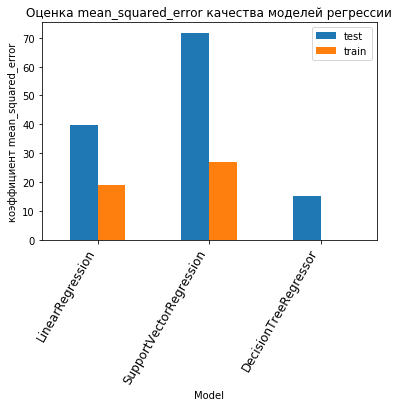

In [92]:
#визуализация оценок
TestModels_ms.plot(kind='bar')
plt.xticks( TestModels_ms.index, TestModels_ms.Model, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel('Model')
plt.ylabel('коэффициент mean_squared_error')
plt.title('Оценка mean_squared_error качества моделей регрессии')
plt.show()

Метрика измеряет среднюю сумму квадратной разности между фактическим значением и прогнозируемым значением для всех точек данных.

Для среднеквадратической ошибки наименьшее значение коэффициента - лучшее. 
Поэтому можно сделать вывод, что лучше других с задачей справился метод DecisionTreeRegressor (метод дерева решений).

Его коэффициенты ниже остальных как на тестовых, так и тренировочных данных:
- test=15.134328
- train=0

In [95]:
#Средняя абсолютная погрешность регрессии потерь
TestModels_ma

,Model,test,train
0,LinearRegression,4.236270,2.955382
1,SupportVectorRegression,4.972820,2.976398
2,DecisionTreeRegressor,2.886567,0.000000


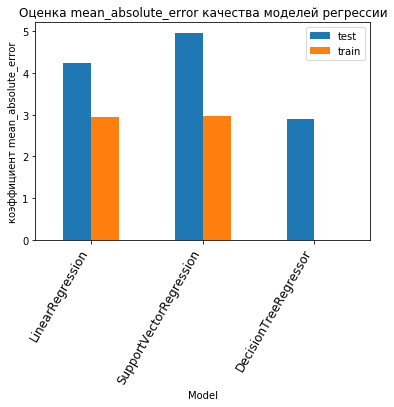

In [96]:
#визуализация оценок
TestModels_ma.plot(kind='bar')
plt.xticks( TestModels_ma.index, TestModels_ma.Model, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel('Model')
plt.ylabel('коэффициент mean_absolute_error')
plt.title('Оценка mean_absolute_error качества моделей регрессии')
plt.show()

Метрика измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением.

Значение 0 указывает на отсутствие ошибок или точных прогнозов. Поэтому можно сделать вывод, что лучше других с задачей справился метод DecisionTreeRegressor (метод дерева решений).

Его коэффициенты ниже остальных как на тестовых, так и тренировочных данных:

- test=2.886567
- train=0

In [93]:
#(коэффициент детерминации) функция оценки регрессии
TestModels_r2

,Model,test,train
0,LinearRegression,0.697308,0.733740
1,SupportVectorRegression,0.453524,0.621391
2,DecisionTreeRegressor,0.884775,1.000000


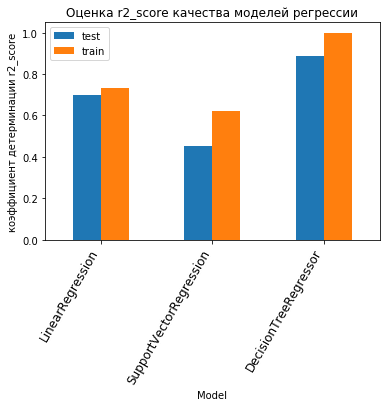

In [94]:
#визуализация оценок
TestModels_r2.plot(kind='bar')
plt.xticks( TestModels_r2.index, TestModels_r2.Model, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel('Model')
plt.ylabel('коэффициент детерминации r2_score')
plt.title('Оценка r2_score качества моделей регрессии')
plt.show()

Из графика выше, можно сделать вывод, что лучше других с задачей справился метод DecisionTreeRegressor (метод дерева решений).

Его коэффициенты детерминации (r2_score) выше остальных как на тестовых, так и тренировочных данных:
- test=0.884775
- train=1.000000

(Если же коэффициент детерминации алгоритма близок к 1, скорей всего, это хороший алгоритм, который близок к оптимальному.)